<a href="https://colab.research.google.com/github/92909/Data-Science/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 8.18MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("/root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv")
print(data.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classy = DecisionTreeClassifier(criterion='entropy', random_state=42)
classy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
y_pred = classy.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0]


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy)

Accuracy :  0.7207792207792207


In [26]:
class_report = classification_report(y_test, y_pred)
print("Classification report : ", class_report)

Classification report :                precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [27]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matric : ", conf_matrix)

Confusion matric :  [[76 23]
 [20 35]]


<ipython-input-33-9dde03371fdc>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


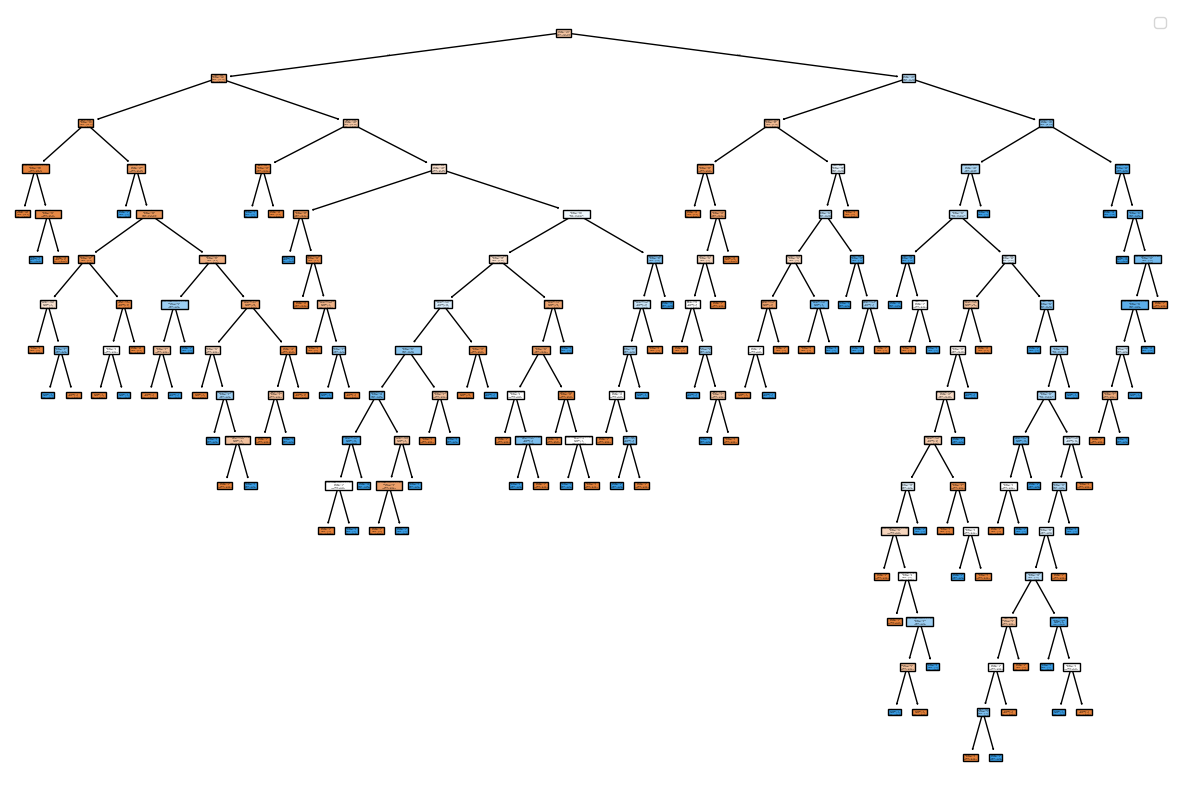

In [33]:
# visualizing the data
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(classy, filled=True, feature_names=X.columns.to_list(), class_names=["No Diabetes", "Diabetes"])
plt.legend()
plt.show()